# Automatic Pairwise Causal Discovery

### Conditional Distribution Similarity Score

Goals: 
- evaluate pairwise methods from causal discovery toolbox. Particularly `CDS`: conditional distribution similarity
- analize relation between *Gross National Income per capita* (x) and *life expectancy* (y) 

Data Sources:
-  Information for pair0074: http://webdav.tuebingen.mpg.de/cause-effect/pair0074_des.txt, based on [UNdata](http://data.un.org)
- pair0001 & pair0086: from http://webdav.tuebingen.mpg.de/cause-effect/
  
Libraries
- causal inference: `cdt`
- visualization: `matplotlib` and `seaborn`
- other libraries: `pandas`, `numpy`

### Step 1: Load and explore data
#### 1.1.- Load data from `http://webdav.tuebingen.mpg.de/cause-effect`

In [1]:
import pandas as pd
df_xy = pd.read_csv('http://webdav.tuebingen.mpg.de/cause-effect/pair0074.txt', sep=' ', names=['x','y'], index_col=False)
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
x    194 non-null int64
y    194 non-null int64
dtypes: int64(2)
memory usage: 3.2 KB


#### 1.2.- Visualization

Histograms in diagonal. Scatterplot off diagonal

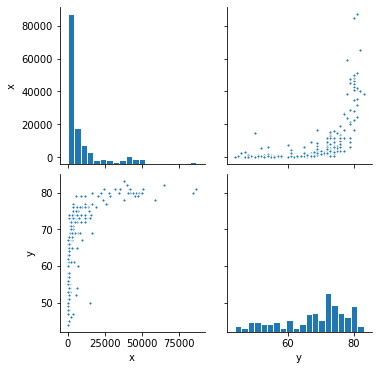

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.PairGrid(df_xy, vars=["x", "y"])
g = g.map_diag(plt.hist, edgecolor="w", bins=20)
g = g.map_offdiag(plt.scatter, edgecolor="w", s=10)

Next visualization shows joint probabilities *p(x,y)* in the left charts and conditional probabilities in the right charts. So we can compare *p(x/yi)* in the upper right charts with *p(y/xi)* in the lower right charts, for 3 given values (thresholds) of y and x respectively.

In [3]:
import numpy as np
from matplotlib.ticker import NullFormatter

def plot_conditional_distributions(x,y,nbins=20,xlabel='x',ylabel='y'):
    # Code derived from https://www.astroml.org/book_figures/chapter3/fig_conditional_probability.html 
    # Copyright (c) 2012-2013, Jacob Vanderplas All rights reserved.
    # License: BSD 
    
    """
Joint and Conditional Probabilities
-----------------------------------

An example of a two-dimensional probability distribution. The color-coded
panel shows p(x, y). The two panels to the left and below show marginal
distributions in x and y. The panels to the right show
the conditional probability distributions p(x|y) for N=4
different values of y (as marked in the left panel).
Note: in the original code there are 3 panels.
"""
    
    MIN_X = min(x)
    MAX_X = max(x)
    MIN_Y = min(y)
    MAX_Y = max(y)

    BINS=nbins
    H, ybins, xbins = np.histogram2d(y, x, bins=BINS)
    H /= np.sum(H)

    #------------------------------------------------------------
    # plot the result
    fig = plt.figure(figsize=(10, 5))

   # define axes
    ax_Pxy = plt.axes((0.2, 0.34, 0.27, 0.52))
    ax_Px = plt.axes((0.2, 0.14, 0.27, 0.2))
    ax_Py = plt.axes((0.1, 0.34, 0.1, 0.52))
    ax_cb = plt.axes((0.48, 0.34, 0.01, 0.52))
    ax_Px_y = [plt.axes((0.65, 0.68, 0.32, 0.16)),
          plt.axes((0.65, 0.50, 0.32, 0.16)),
           plt.axes((0.65, 0.32, 0.32, 0.16)),
            plt.axes((0.65, 0.14, 0.32, 0.16))
          ]
    # set axis label formatters

    ax_Px_y[0].xaxis.set_major_formatter(NullFormatter())
    ax_Px_y[1].xaxis.set_major_formatter(NullFormatter())

    ax_Pxy.xaxis.set_major_formatter(NullFormatter())
    ax_Pxy.yaxis.set_major_formatter(NullFormatter())

    ax_Px.yaxis.set_major_formatter(NullFormatter())
    ax_Py.xaxis.set_major_formatter(NullFormatter())

    # draw the joint probability
    plt.axes(ax_Pxy)
    H *= 1000
    plt.imshow(H, interpolation='nearest', origin='lower', aspect='auto',extent=[MIN_X, MAX_X, MIN_Y, MAX_Y], cmap=plt.cm.binary)
    #plt.imshow(H,extent=[MIN_X,MAX_X,MAX_Y,MIN_Y])

    cb = plt.colorbar(cax=ax_cb)
    cb.set_label('$p(x, y)$')
    plt.text(0, 1.02, r'$\times 10^{-3}$',
         transform=ax_cb.transAxes)

    # draw p(x) distribution
    ax_Px.plot(xbins[1:], H.sum(0), '-k', drawstyle='steps')

    # draw p(y) distribution
    ax_Py.plot(H.sum(1), ybins[1:], '-k', drawstyle='steps')

    # define axis limits
    #ax_Pxy.set_xlim(0, 2)
    ax_Pxy.set_xlim(min(x),max(x))
    #ax_Pxy.set_ylim(0, 2)
    ax_Pxy.set_ylim(min(y), max(y))
    #ax_Px.set_xlim(0, 2)
    ax_Px.set_xlim(min(x), max(x))

    #ax_Py.set_ylim(0, 2)
    ax_Py.set_ylim(min(y), max(y))


    # label axes
    ax_Pxy.set_xlabel('${}$'.format(xlabel))
    ax_Pxy.set_ylabel('${}$'.format(ylabel))
    ax_Px.set_xlabel('${}$'.format(xlabel))
    ax_Px.set_ylabel('$p({})$'.format(xlabel))
    ax_Px.yaxis.set_label_position('right')
    ax_Py.set_ylabel('${}$'.format(ylabel))
    ax_Py.set_xlabel('$p({})$'.format(ylabel))
    ax_Py.xaxis.set_label_position('top')


    # draw marginal probabilities

    N = 4
    iy = [N*BINS//(N+1), 3*BINS//(N+1), 2*BINS//(N+1), 1*BINS//(N+1)]

    colors = 'rgcb'
    axis = ax_Pxy.axis()
    for i in range(N):
        # overplot range on joint probability
        ax_Pxy.plot([MIN_Y, MAX_Y, MAX_X, MIN_X],
                [ybins[iy[i] + 1], ybins[iy[i] + 1],
                 ybins[iy[i]], ybins[iy[i]]], c=colors[i], lw=1)
        Px_y = H[iy[i]] / (H[iy[i]].sum()+0.00001)
        ax_Px_y[i].plot(xbins[1:], Px_y, drawstyle='steps', c=colors[i])
        ax_Px_y[i].yaxis.set_major_formatter(NullFormatter())
        ax_Px_y[i].set_ylabel('p({}|{}={:.1f})'.format(xlabel,ylabel,ybins[iy[i]]))
    ax_Pxy.axis(axis)

    ax_Px_y[(N-1)].set_xlabel('${}$'.format(xlabel))

    ax_Pxy.set_title('Joint Probability')
    ax_Px_y[0].set_title('Conditional Probability')

    plt.show()

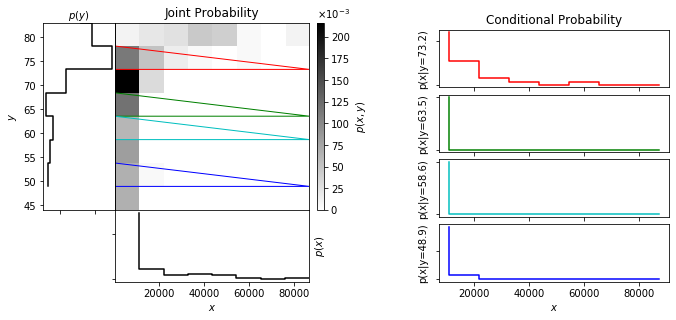

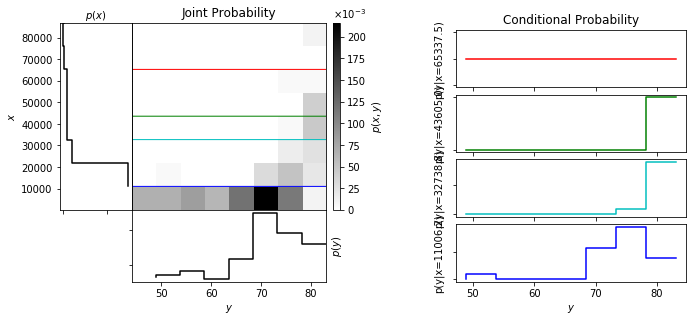

In [4]:
x = np.round(df_xy['x'])
y = np.round(df_xy['y'])
plot_conditional_distributions(x,y,nbins=8)
plot_conditional_distributions(y,x,nbins=8, xlabel='y', ylabel='x')

### Step 2: Pairwise causal discovery

#### 2.1.- Plot directed graph
Use `CDS` default implementation (and parameters) from `cdt.causality.pairwise`

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


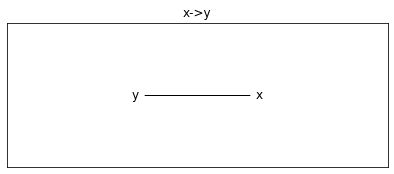

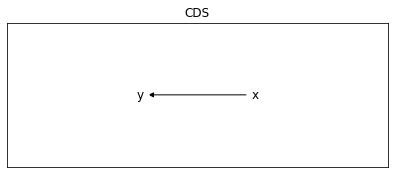

In [5]:
from cdt.causality.pairwise import *
import networkx as nx

ugraph = nx.Graph()
ugraph.add_edges_from([('x','y')])


def format_graph_plot(graph,mycount, title):
    pos = nx.drawing.layout.circular_layout(graph)
    plt.figure(0,figsize=(15,9))
    plt.subplot(3,2,mycount)
    nx.draw_networkx(graph,pos, node_color='#ffffff')

    plt.title(title)
    plt.margins(1,0.5)
    plt.show()

format_graph_plot(ugraph, 1, 'x->y')
    

def orient_graph_with_model(data, ugraph, mymodel):
    model = mymodel()
    graph = model.orient_graph(data, nx.DiGraph(ugraph))
    sorted_graph = nx.DiGraph()
    sorted_graph.add_edges_from(sorted(graph.edges()))
    return sorted_graph

graph = orient_graph_with_model(df_xy, ugraph, CDS)
format_graph_plot(graph, 2, 'CDS')

def test_pairwise_model(data, mymodel,mycount):
    obj = mymodel()
    graph = obj.orient_graph(data, nx.DiGraph(ugraph))
    sorted_graph = nx.DiGraph()
    sorted_graph.add_edges_from(sorted(graph.edges()))
    pos = nx.drawing.layout.circular_layout(sorted_graph)   
    #
    plt.subplot(3,2,mycount)
    nx.draw_networkx(sorted_graph,pos,node_color='#ffffff')
    plt.title(mymodel.__name__)
    plt.margins(1,0.5)


#### 2.2.- Analyze `CDS` method: theory and context

The `CDS` (*Conditional Distribution Similarity Statistic*)  measures the std. of the rescaled values of y (resp. x) after binning in the x (resp. y) direction. The lower the std. the more likely the pair to be x->y (resp. y->x). It is a single feature of the Jarfo model. See https://fentechsolutions.github.io/CausalDiscoveryToolbox/html/causality.html#cds. 

##### 2.2.1.-The paper

This metric is based on the paper [Conditional distribution variability measures for causality
detection](https://arxiv.org/pdf/1601.06680.pdf), by J.A.R. Fonollosa, 2016. A quote from the *Introduction* of this paper: 
>"*In this paper we develop new causality measures based on the assumption that
the shape of the conditional distribution p(Y |X = x) tends to be very similar for different
values of x if the random variable X is the cause of Y . The main difference with respect to
previous methods is that we do not impose a strict independence between the conditional
distribution (or noise) and the cause. However we still expect the conditional distribution to
have a similar shape or similar statistical characteristics for different values x of the cause*"

And a quote from their *Conclusions*
> "*We have proposed several measures of the variability of conditional distributions as features
to infer causal relationships in a given pair of variables. In particular, the proposed standard
deviation of the normalized conditional distributions stands out as one of the best features
in our results.*"

##### 2.2.2.- Assumptions and other references

The assumption of "similary shape" that supports this method is also related to the Principle (physically) Independent Mechanisms ([Peters et al. Elements of Causal Inference, 2017](https://library.oapen.org/bitstream/handle/20.500.12657/26040/11283.pdf?sequence=1&isAllowed=y)), that states that
> "*The causal generative process of a
system’s variables is composed of autonomous modules that do not inform or influence each other.
In the probabilistic case, this means that the conditional distribution of each
variable given its causes (i.e., its mechanism) does not inform or influence the
other conditional distributions*"

The special case of two variables has been previously formulated by [Daniusis et al, 2010](https://arxiv.org/pdf/1203.3475.pdf) as "*independence of input and function*", and referred by
[Shajarisales et al., 2015](http://proceedings.mlr.press/v37/shajarisales15.pdf) as the postulate of *Independence of Cause and Mechanism (ICM)*. 

According to Daniusis et al:
> "*If X -> Y , the distribution of X and the function f mapping X to Y are independent since they correspond to independent mechanisms of nature.[...] While this postulate is informal in the sense that we do not specify what we mean by independence, we point out [...] a formalization in terms of algorithmic independence [... and ...] postulate that the shortest description of P(X, Y ) is given by separate descriptions of P(X) and f (in the sense of Kolmogorov complexity). However, since Kolmogorov complexity is uncomputable, practical implementations must rely on other notions of dependence.*"

###### 2.2.3.- Datasets
J. Peters, P. Daniusis and N. Shajarisales were all members at the time of the *Max Planck Institute (MPI) at Tuebingen*, with B. Schölkopf, who is also coauthor of the previously mentioned articles. And another researcher from MPI, D. Janzing, whose *"Information-geometric approach to inferring causal directions."* is one of the references cited by author of CDS, as first author of the IGCI approach that was also implemented as part of its complete (Jarfo) model. Janzing is also the contact responsible for the  [database with cause-effect pairs](https://webdav.tuebingen.mpg.de/cause-effect/).

Otherwise, Jarfo model scored 2nd on the Kaggle competition [*Cause-Effect Pairs*](https://www.kaggle.com/c/cause-effect-pairs/) based on namesake challenge from [chalearn.org](http://www.chalearn.org/challenges.html) promoted by IJCNN 2013 and NIPS 2013. And probably inspired by a previous [causality challenge hosted on 2007](http://www.causality.inf.ethz.ch/challenge.php)

#### 2.3 Analyze CDS method: hands-on

In [6]:
def test_pairwise_cds_score(X, Y, model):
    x = df_xy[X]
    y = df_xy[Y]
    mybool = model.cds_score(x,y)<model.cds_score(y,x)
    return mybool

COL_X = 'x'
COL_Y = 'y'

myresult = test_pairwise_cds_score(COL_X, COL_Y, CDS())
print("'{}' -> '{}' seems {} according to cds_score (with default parameters)".format(COL_X, COL_Y, myresult))

myresult2 = test_pairwise_cds_score(COL_X, COL_Y, CDS(maxdev=2))
print("'{}' -> '{}' seems {} according to cds_score (with `maxdev=2`)".format(COL_X, COL_Y, myresult2))

'x' -> 'y' seems True according to cds_score (with default parameters)
'x' -> 'y' seems False according to cds_score (with `maxdev=2`)


`x` -> `y` as True is what showed previously the `orient_graph` method. This is consistent with behavior with default parameters. But according to my first (quick&dirty) experiments it seems results depend much on the discretization or binning phase. And this discretization phase depends on 3 parameters: `ffactor`, `maxdev` and `minc`. 

As the [author explains]([https://github.com/jarfo/cause-effect/issues/1#issuecomment-724697472]):
 "*ffactor and maxdev controls the discretization (quantization) 
process (ffactor controls the resolution and maxdev the outliers).
minc is a threshold on the minimum number of samples for a given x discrete value or label. A x value that appears less than minc times is ignored*"

Default values are `ffactor`=2, `maxdev`=3, `minc`=12

First of all, let's understand the implications of default values for our variables

#### 2.3.1.- Influence of CDS parameters in discretization errors

`discretized_values()` and `discretized_sequence()` methods in the next analysis are based on `CDS` implementation by [`CausalDiscoveryToolbox`](https://github.com/FenTechSolutions/CausalDiscoveryToolbox/blob/master/cdt/causality/pairwise/CDS.py#L69). Which in turn is based on original `conditional_distribution_similarity` feature on *jarfo* model: https://github.com/jarfo/cause-effect/blob/master/features.py#L89

In [7]:
FFACTOR = 2
MAXDEV = 3

def discretized_values(x, ffactor, maxdev):
    if len(set(x)) > (2*ffactor*maxdev+1):
        vmax =  ffactor*maxdev
        vmin = -ffactor*maxdev
        return range(vmin, vmax+1)
    else:
        return sorted(list(set(x)))

x = df_xy[COL_X]
myrange = discretized_values(x, FFACTOR, MAXDEV)
print("x: {} different ({}) values are discretized in {} bins, on {}".format(len(set(x)),x.dtype,len(myrange),myrange))

y = df_xy[COL_Y]
myrange = discretized_values(y, FFACTOR, MAXDEV)
print("y: {} different ({}) values are discretized in {} bins, on {}".format(len(set(y)),y.dtype,len(myrange),myrange))


x: 178 different (int64) values are discretized in 13 bins, on range(-6, 7)
y: 39 different (int64) values are discretized in 13 bins, on range(-6, 7)


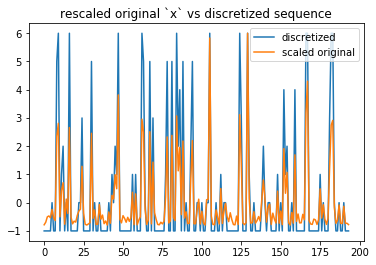

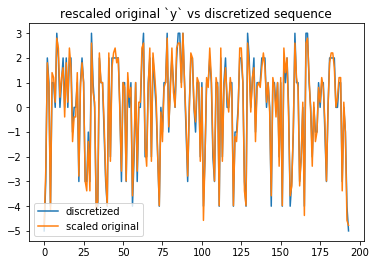

Average sMAPE error between discrete filtered sequences and scaled originals is 16.4%



In [8]:
import numpy as np
from collections import Counter

def discretized_sequence(x, ffactor=2, maxdev=3, norm=True):
    if len(set(x)) > len(range(-ffactor*maxdev,ffactor*maxdev+1)):
        
        x = (x - np.mean(x))/np.std(x)
        xf = x[abs(x) < maxdev]
        x = (x - np.mean(xf))/np.std(xf)
        x = np.round(x*ffactor)
        vmax =  ffactor*maxdev
        vmin = -ffactor*maxdev
        x[x > vmax] = vmax
        x[x < vmin] = vmin
    return x

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return 0.5*np.mean(abs(y_true-y_pred)/(abs(y_true)+abs(y_pred)))

def discretized_sequence_minc(xd,minc=12, trace=False):
    xdf= xd.where(~xd.isin([x for x, count in Counter(xd).items() if count < minc]))
    ratio_nulls = len(xdf[xdf.isnull()])/len(xdf)
    
    if trace:
        print('{:.3}% filtered values because count <  MINC={}'.format(100*ratio_nulls, minc))
    # To ignore effect of MINC filtering unless discarded values exceed 50% of samples
    if ratio_nulls > 0.5:
        raise ValueError('Too much filtered values ({:.4}%) because count <  MINC={}'.format(100*ratio_nulls, minc))
    
    xdf[np.isnan(xdf)]=max(xd)
    return xdf

def rescaled_sequence(x, amplitude=1):
    xs =amplitude*(x - np.mean(x))/(max(x) -np.mean(x))
    return xs

def explore_discretization_errors(col, ffactor=2, maxdev=3, minc=12, plot=True, trace=False):
    x = df_xy[col]
  
    xd = discretized_sequence(x, ffactor=ffactor, maxdev=maxdev)
    xs =rescaled_sequence(x,max(xd))
    xdf= discretized_sequence_minc(xd,minc=minc, trace=trace)
    smape = symmetric_mean_absolute_percentage_error(xs,xdf)
    
    if plot:
        plt.figure()
        plt.plot(xd, label="discretized")
        plt.plot(xs, label="scaled original")
        plt.legend()
        plt.title('rescaled original `{}` vs discretized sequence'.format(col))
        plt.show()
    
    return smape

avg_error = (explore_discretization_errors(COL_X) + explore_discretization_errors(COL_Y))/2
DISCRETIZATION_ERROR_MESSAGE="Average sMAPE error between discrete filtered sequences and scaled originals is"
print("{} {:.1F}%\n".format(DISCRETIZATION_ERROR_MESSAGE,100*avg_error))

Considering also that, with default parameters, effect on `MINC`=12 removes more than 16% of values of y. Let's see what happens if we set `minc=1` and tune `ffactor` and `maxdev` we can get discretization distorsion (*Symmetric Mean Average Percentage Error*) below 10%:

In [9]:
def print_discretization_errors(COL_X,COL_Y,p):
    error_x = explore_discretization_errors(COL_X, ffactor=p["ffactor"],maxdev=p["maxdev"],minc=p["minc"], plot=False)
    error_y = explore_discretization_errors(COL_Y, ffactor=p["ffactor"],maxdev=p["maxdev"],minc=p["minc"], plot=False)
    print("\t{:.1F}%: {}".format(50*(error_x+error_y),p))

print("{}: ".format(DISCRETIZATION_ERROR_MESSAGE))
print_discretization_errors(COL_X,COL_Y,{"ffactor":2,"maxdev":3,"minc":1})
print_discretization_errors(COL_X,COL_Y,{"ffactor":6,"maxdev":3,"minc":1})

Average sMAPE error between discrete filtered sequences and scaled originals is: 
	15.0%: {'ffactor': 2, 'maxdev': 3, 'minc': 1}
	9.5%: {'ffactor': 6, 'maxdev': 3, 'minc': 1}


By generating a meshgrid, with `ffactor` and `maxdev` from 1 to 10, it is possible to visualize the discretization error surface:

In [10]:
def test_discretization_error_grid_params(X, Y, f_range, d_range, minc=12):
    errors = np.empty((len(f_range),len(d_range)))
    for f in f_range:
        for d in d_range:
            mape_x = explore_discretization_errors(X, ffactor=f, maxdev=d, minc=minc, plot=False)
            mape_y = explore_discretization_errors(Y, ffactor=f, maxdev=d, minc=minc, plot=False)
            
            errors[np.where(f_range==f)[0][0]][np.where(d_range==d)[0][0]] = (mape_x + mape_y)/2
    return errors

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_meshgrid(f_range,d_range,nu,title='f(ffactor,maxdev)', rotate=False,interactive=False):
    F,D = np.meshgrid(d_range,f_range)
    
    if interactive:
        %matplotlib notebook
    else:
        %matplotlib inline

    fig = plt.figure()      
    ax = Axes3D(fig)
    
    if rotate:
        # Rotate default angle for better visualization
        ax.view_init(-140, 30)
    
    # Surface, wireframe and scatter3D are alternative view. It seems wireframe is more clear for this purpose
    #ax.plot_surface(F, D, nu)
    ax.plot_wireframe(F, D, nu)
    #ax.scatter3D(F,D, nu)
    
    plt.xlabel('maxdev')
    plt.ylabel('ffactor')
    plt.title(title)
   
    plt.show()
    return

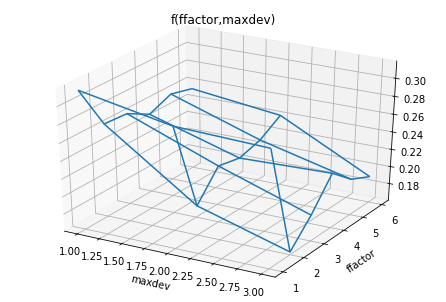

In [11]:
# default ffactor was 3. I make a grid from 1 to 6
F_RANGE = np.arange(1, 7, 1)

# default maxdev was 2. I make a grid from 1 to 4. Higher values get too much discards because MINC<12
D_RANGE = np.arange(1, 4, 1)    

error = test_discretization_error_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=12)

plot_meshgrid(F_RANGE,D_RANGE,error,interactive=False)

For `minc=12` error discretization has a local minima on default values `ffactor`=2 and `maxdev`=3. That is good. However, we are constrained because higher resolution values generate too much discarded samples (>50%). So if we compare with `minc=1` and higher ranges for `ffactor` and `maxdev`:

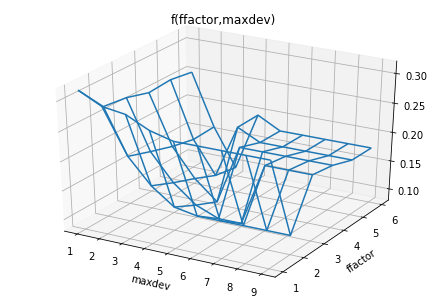

In [12]:
# default ffactor was 3. I make a grid from 1 to 6
F_RANGE = np.arange(1, 7, 1)

# default maxdev was 2. I make a grid from 1 to 9
D_RANGE = np.arange(1, 10, 1)  
error = test_discretization_error_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=1)
plot_meshgrid(F_RANGE,D_RANGE,error, interactive=False)

Besides local minimum on `ffactor=2`, `maxdev=3` we now find lower minimums on `ffactor=3` and `maxdev in (5,6)` and also `ffactor=4` and `maxdev=4`. We get errors below 9%, lower than 16.4% for default values. Also lower than 15% resulting to set `minc=1` and keep `ffactor=2` and `maxdev=3`:

In [13]:
print("{}: ".format(DISCRETIZATION_ERROR_MESSAGE))
print_discretization_errors(COL_X,COL_Y,{"ffactor":4,"maxdev":4,"minc":1})
print_discretization_errors(COL_X,COL_Y,{"ffactor":3,"maxdev":6,"minc":1})
print_discretization_errors(COL_X,COL_Y,{"ffactor":3,"maxdev":5,"minc":1})
print_discretization_errors(COL_X,COL_Y,{"ffactor":2,"maxdev":3,"minc":1})

Average sMAPE error between discrete filtered sequences and scaled originals is: 
	8.5%: {'ffactor': 4, 'maxdev': 4, 'minc': 1}
	8.5%: {'ffactor': 3, 'maxdev': 6, 'minc': 1}
	8.5%: {'ffactor': 3, 'maxdev': 5, 'minc': 1}
	15.0%: {'ffactor': 2, 'maxdev': 3, 'minc': 1}


#### 2.3.2.- Sensitivity of `cds_score` and orientation estimations to `CDS` parameters

'x'->'y' seems True 34/54=63% times according to cds_score


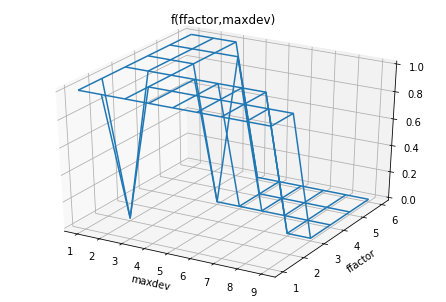

In [14]:
def test_pairwise_cds_score_grid_params(X, Y, f_range, d_range, minc=12):
    result = []
   
    mysize = (len(f_range),len(d_range))
    
    aresult = np.empty(mysize)
    for f in f_range:
        for d in d_range:
            x = df_xy[X]
            y = df_xy[Y]
            obj = CDS(ffactor=f, maxdev=d,minc=minc)
            mybool = obj.cds_score(x,y)<obj.cds_score(y,x)
            result.append(mybool)
            aresult[np.where(f_range==f)[0][0]][np.where(d_range==d)[0][0]] = mybool
    myres = 100*np.mean(result)
    print("'{}'->'{}' seems True {}/{}={:.0f}% times according to cds_score".format(X,Y,np.sum(result),len(result),myres))
   
    return aresult

cds_score = test_pairwise_cds_score_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=12)
plot_meshgrid(F_RANGE,D_RANGE,cds_score, interactive=False)

'x'->'y' seems True 39/54=72% times according to cds_score


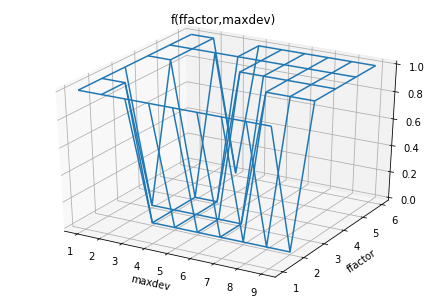

In [15]:
cds_score = test_pairwise_cds_score_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=1)
plot_meshgrid(F_RANGE,D_RANGE,cds_score)

### Trying different x,y pairs

#### Example 2: http://webdav.tuebingen.mpg.de/cause-effect/pair0086_des.txt 

Data from kamernet.nl, gathered by Joris Mooij in 2007: 
- First column:  size in m^2 of appartment/room
- Second column: monthly rent in EUR



In [16]:
df_xy = pd.read_csv('http://webdav.tuebingen.mpg.de/cause-effect/pair0086.txt', sep=' ', names=['x','y'], index_col=False)
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 2 columns):
x    666 non-null int64
y    666 non-null int64
dtypes: int64(2)
memory usage: 10.5 KB


In [17]:
myresult = test_pairwise_cds_score(COL_X, COL_Y, CDS())
print("'{}' -> '{}' seems {} according to cds_score (with default parameters)".format(COL_X, COL_Y, myresult))

'x' -> 'y' seems True according to cds_score (with default parameters)


'x'->'y' seems True 31/54=57% times according to cds_score


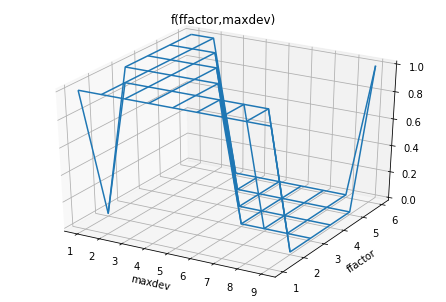

In [18]:
cds_score = test_pairwise_cds_score_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=12)
plot_meshgrid(F_RANGE,D_RANGE,cds_score, interactive=False)

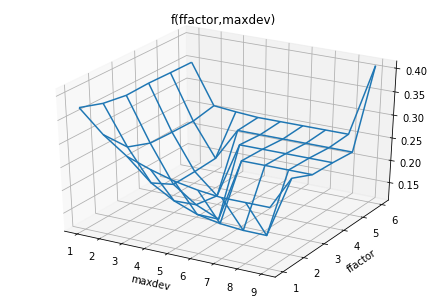

In [19]:
error = test_discretization_error_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=12)
plot_meshgrid(F_RANGE,D_RANGE,error, interactive=False)

It seems that minimum discretization error for `minc=12` corresponds to `ffactor=3`, `maxdev=5`. And for this parameterization `x`->`y` is True. It makes sense.

If we set `minc=1`:

'x'->'y' seems True 19/54=35% times according to cds_score


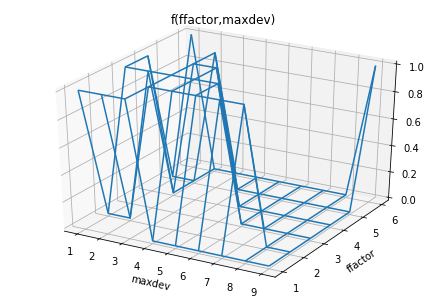

In [20]:
cds_score = test_pairwise_cds_score_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=1)
plot_meshgrid(F_RANGE,D_RANGE,cds_score, interactive=False)

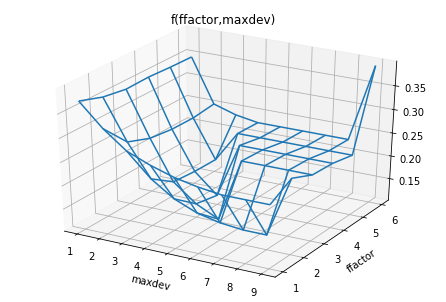

In [21]:
error = test_discretization_error_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=1)
plot_meshgrid(F_RANGE,D_RANGE,error, interactive=False)

It seems that minimum discretization error for `minc=1` corresponds to `ffactor=3`, `maxdev=5` too. And for this parameterization `x`->`y` is also True.

#### Example 3: http://webdav.tuebingen.mpg.de/cause-effect/pair0001_des.txt

- `x`: altitude, `y`: temperature (average over 1961-1990)
- ground truth: `x` --> `y`


In [22]:
df_xy = pd.read_csv('http://webdav.tuebingen.mpg.de/cause-effect/pair0001.txt', sep=' ', names=['x','y'], index_col=False)
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 2 columns):
x    349 non-null float64
y    349 non-null float64
dtypes: float64(2)
memory usage: 5.6 KB


In [23]:
myresult = test_pairwise_cds_score(COL_X, COL_Y, CDS())
print("'{}' -> '{}' seems {} according to cds_score (with default parameters)".format(COL_X, COL_Y, myresult))

'x' -> 'y' seems True according to cds_score (with default parameters)


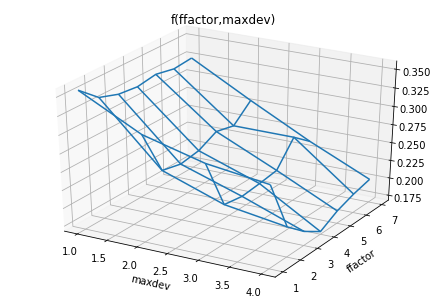

In [24]:
# I make a grid with ffactor from 1 to 7 and maxdev from 1 to 4. Higher values generate >50% filtered samples
F_RANGE = np.arange(1, 8, 1)
D_RANGE = np.arange(1, 5, 1)

error = test_discretization_error_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=12)
plot_meshgrid(F_RANGE,D_RANGE,error, interactive=False)

'x'->'y' seems True 28/28=100% times according to cds_score


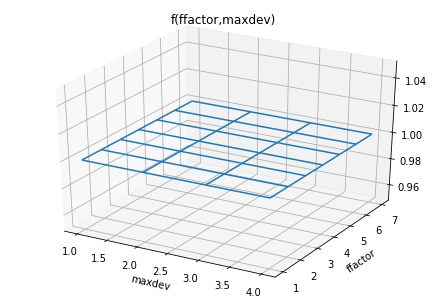

In [25]:
cds_score = test_pairwise_cds_score_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=12)
plot_meshgrid(F_RANGE,D_RANGE,cds_score, interactive=False)
plt.show()

With `minc=12` for this example more than 50% examples are used and the models states `x`->`y` is True 28/28 times.

And with `minc=1`

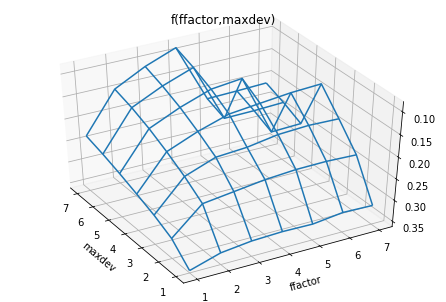

In [26]:
F_RANGE = np.arange(1, 8, 1)
D_RANGE = np.arange(1, 8, 1)

error = test_discretization_error_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=1)
plot_meshgrid(F_RANGE,D_RANGE,error, interactive=False, rotate=True)
plt.show()

'x'->'y' seems True 44/49=90% times according to cds_score


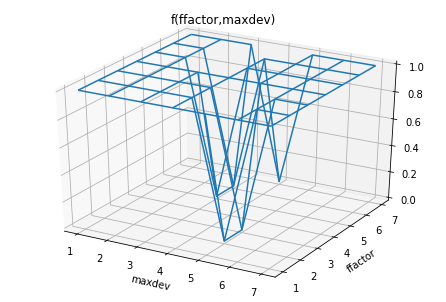

In [27]:
cds_score = test_pairwise_cds_score_grid_params(COL_X, COL_Y, F_RANGE, D_RANGE, minc=1)
plot_meshgrid(F_RANGE,D_RANGE,cds_score, interactive=False)
plt.show()

Minimum discretization error seems on `ffactor=4` and `maxdev=7`. Which generates indeed `x`->`y` as True

#### More examples:

Ground truth for http://webdav.tuebingen.mpg.de/cause-effect/pair0062.txt: y-->x
CDS default estimates for y->x: False

Average sMAPE error between discrete filtered sequences and scaled originals is: 
	15.6%: {'ffactor': 2, 'maxdev': 3, 'minc': 12}

More discretization error details:

5.73% filtered values because count <  MINC=12


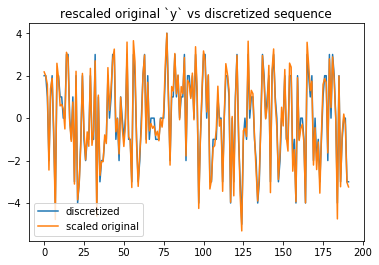

12.0% filtered values because count <  MINC=12


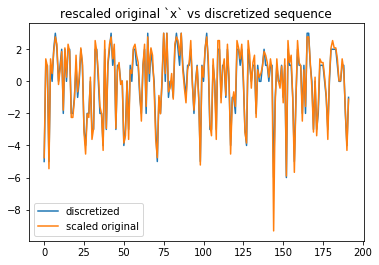

'y'->'x' seems True 2/15=13% times according to cds_score


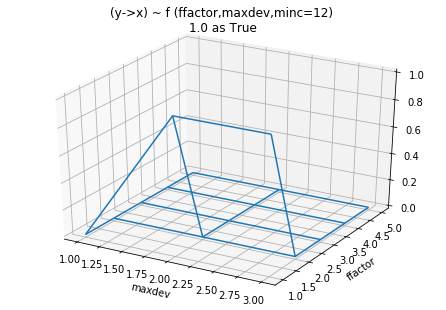

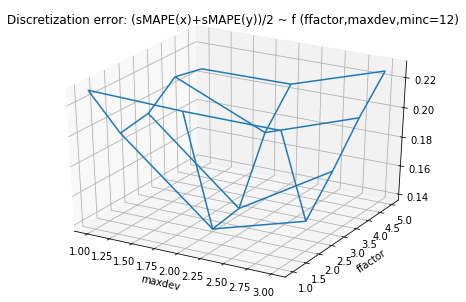

In [28]:
BASEURL = "http://webdav.tuebingen.mpg.de/cause-effect/pair00"
MINC = 12

def explore_example(df_xy,col_x,col_y,minc=12,f_max=5, d_max=3): 
    print("CDS default estimates for {}->{}: {}\n".format(col_x,col_y,test_pairwise_cds_score(col_x, col_y, CDS())))
    print("{}: ".format(DISCRETIZATION_ERROR_MESSAGE))
    print_discretization_errors(col_x,col_y,{"ffactor":2,"maxdev":3,"minc":minc})
    print("\nMore discretization error details:\n")
    explore_discretization_errors(col_x, ffactor=2,maxdev=3, minc=minc, trace=True)
    explore_discretization_errors(col_y, ffactor=2,maxdev=3, minc=minc, trace=True)
    
    f_range = np.arange(1, f_max+1, 1)
    d_range = np.arange(1, d_max+1, 1)
    cds_score = test_pairwise_cds_score_grid_params(col_x, col_y, f_range, d_range, minc=minc)
    plot_meshgrid(f_range,d_range,cds_score, interactive=False, title='({}->{}) '.format(col_x,col_y)+ '~ f (ffactor,maxdev,minc='+str(minc)+') \n1.0 as True')
    
    error = test_discretization_error_grid_params(col_x, col_y, f_range, d_range, minc=minc)
    plot_meshgrid(f_range,d_range,error, interactive=False, rotate=False, title='Discretization error: (sMAPE(x)+sMAPE(y))/2 ~ f (ffactor,maxdev,minc='+str(minc)+')')
        
for i in range(62,63):
    url = "{}{}.txt".format(BASEURL,i)
    print("Ground truth for {}: {}".format(url, pd.read_csv('{}'.format(url.replace('.txt','_des.txt')), sep='|').iloc[-1,:][0]))
    df_xy = pd.read_csv('{}'.format(url), sep='\s+', names=['x','y'], index_col=False)
    explore_example(df_xy, 'y','x')

CDS default estimates for y->x: False

Average sMAPE error between discrete filtered sequences and scaled originals is: 
	12.8%: {'ffactor': 2, 'maxdev': 3, 'minc': 1}

More discretization error details:

0.0% filtered values because count <  MINC=1


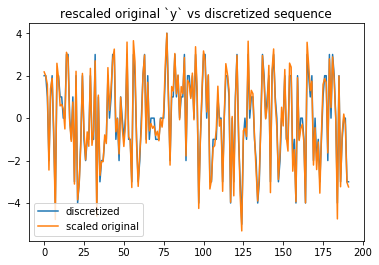

0.0% filtered values because count <  MINC=1


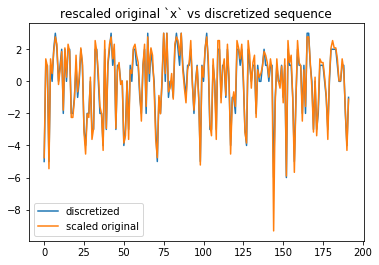

'y'->'x' seems True 21/30=70% times according to cds_score


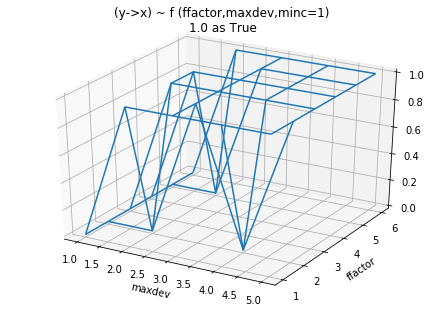

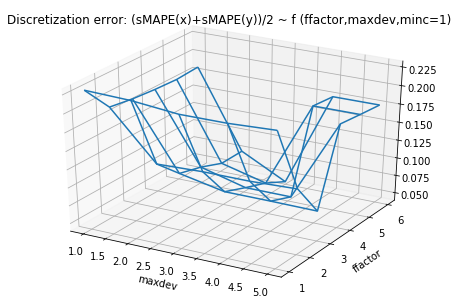

In [29]:
explore_example(df_xy, 'y','x',minc=1, f_max=6, d_max=5)

Remembering the assumption of Conditional Similarity Distribution statistic: *"the shape of the conditional distribution p(Y |X = x) tends to be very similar for different values of x if the random variable X is the cause of Y"*... 

So we expect 4 plots *p(y|x=k)* with similar shape if X is the cause of Y, different shapes otherwise if the assumption does not hold.

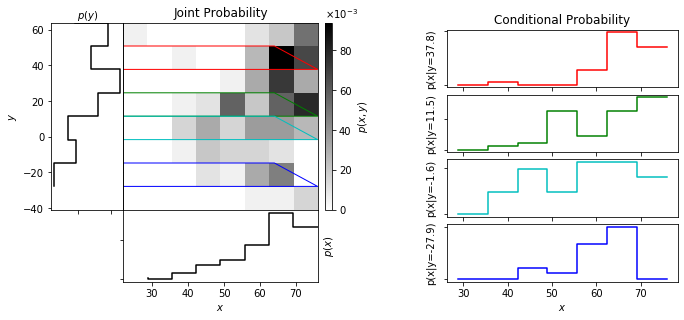

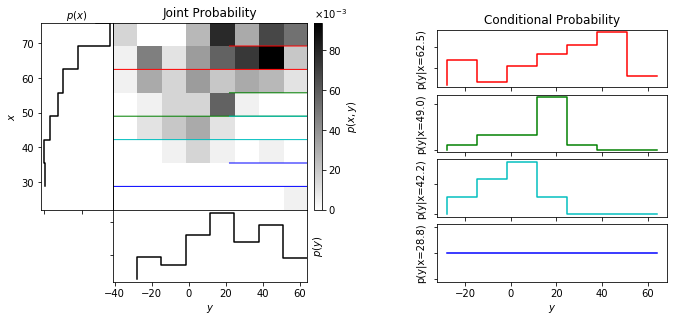

In [30]:
x = np.round(df_xy['x'])
y = np.round(df_xy['y'])
plot_conditional_distributions(x,y,nbins=8)
plot_conditional_distributions(y,x,nbins=8, xlabel='y', ylabel='x')

Visually it seems *P(x|y=k)* have more similar shapes than *P(y|x=k)*. So it make senses, if the assumption holds, that `y`->`x` is more plausible. And this conclusion is also coherent with the ground truth